<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Valeria Ladrón de Guevara Vidrio y Martha Mariela López Molina.

**Fecha:** 24 de junio del 2021.

**Expediente** : if714513 y if721862.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/valerialadron/Proyecto_VLadron_MMLopez

# Proyecto TEMA-2


<img src="covid.jpg">


___
## 1. Entregable.


### 1.1 COVID-19
> En este proyecto se busca simular el comportamiento de Covid-19 en Estados Unidos a partir de la implementación de las vacunas.

### 1.2 Objetivos.

> #### 1.1 Objetivo general.
> Simular el comportamiento del COVID-19 utilizando los datos de Estados Unidos , para observar el impacto que ha tenido la aplicación de la vacuna.
> #### 1.2 Objetivos específicos
1. Se comparará año 2020 y 2021 para observar impacto de vacunas estimando: 
* Número de muertes 
* Número de casos
* Total de personas hospitalizadas



### 1.3 Definición del problema.
> La COVID-19 es la enfermedad causada por el nuevo coronavirus conocido como SARS-CoV-2. La OMS tuvo noticia por primera vez de la existencia de este nuevo virus el 31 de diciembre de 2019, al ser informada de un grupo de casos de «neumonía vírica» que se habían declarado en Wuhan (República Popular China). La única solución a esta enfermedad sería la creación de una nueva vacuna.

> Para 18 de febrero de este año, había al menos siete vacunas distintas que los países empezaron a administrar, dando  prioridad a las personas vulnerables.
Además de que había más de 200 vacunas experimentales en desarrollo, de las cuales más de 60 estaban en fase clínica. 

> La OMS ha recalcado que estar vacunados no significa tirar por la borda las medidas preventivas y arriesgar nuestra salud y la de los demás, sobre todo porque todavía desconocemos el grado en que las vacunas protegen no solo contra la enfermedad sino también contra la infección y la transmisión.

> De igual manera, ha comentado que la mayoría de los científicos prevén que las vacunas que se desarrollen contra la COVID-19 no tendrán una eficacia del 100%. Pero se trabaja para asegurar que toda vacuna aprobada tenga la máxima eficacia posible, de modo que consiga el mayor efecto en la pandemia.

> Es por eso que nos preguntamos "¿Qué impacto han tenido las vacunas hasta el día de hoy? ¿Qué efectividad han tenido?", siendo esas preguntas las bases del desarrollo de este proyecto.

### 1.4 Nodos y variables que se decidieron simular y porqué
* Número de muertes por dia 
* Personas vacunadas por dia
* Personas hospitalizadas por dia
* Total de casos por dia

### 1.5 Definición de hipótesis y supuestos.
**Hipótesis**

* Entre más vacunas aplicadas existan, menor serán total de muertes.
* EUA tendrá menor cantidad de casos por día por las vacunas aplicadas.

**Supuestos**





### 1.6 Obtención de bases de datos
https://ourworldindata.org/coronavirus





<img src="diagrama.jpg">

In [391]:
#Paqueterias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import KernelDensity
from scipy.stats import loglaplace 
from scipy.stats.distributions import norm
from sklearn.model_selection import GridSearchCV
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric.kde import KDEUnivariate
import matplotlib
from collections import defaultdict
from time import time
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from IPython.display import Markdown as md
from scipy.stats import cosine
from scipy.stats import logistic
from scipy.stats import dweibull
from scipy.stats import ncf
from scipy import optimize
%matplotlib inline
import os
import scipy.stats as st
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
#Importando datos
covid = pd.read_csv('covid.csv', encoding="utf-8")
data = covid[covid['location'] == 'United States']
data = data.set_index(['date'])
data.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,
22/01/2020,USA,North America,United States,1.0,NaN,NaN,0.0,NaN,NaN,0.003,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
23/01/2020,USA,North America,United States,1.0,0.0,NaN,0.0,NaN,NaN,0.003,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
24/01/2020,USA,North America,United States,2.0,1.0,NaN,0.0,NaN,NaN,0.006,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
25/01/2020,USA,North America,United States,2.0,0.0,NaN,0.0,NaN,NaN,0.006,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
26/01/2020,USA,North America,United States,5.0,3.0,NaN,0.0,NaN,NaN,0.015,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,0.75


In [278]:
def Acep_rechazo_reducc_var(N:'número de aleatorias a generar (aproximado)',
                 a:'rango inferior',
                 b:'rango superior',
                 f:'función objetivo a generar',
                 t:'función que mayora a f',
                 metodo:'función del método de reducción que se usará para generar variables aleatorias que evaluará el método de aceptación rechazo',
                 vav:'número de variables aleatorias a las que se le aplicará el método elegido'):

    '''
    Esta función nos regresa N variables aleatorias de la distribución f dada usando el método de 
    aceptación y rechazo. Además, se aplica el método reducción de varianza elegido en los parámetros
    al momento de generar las variables aleatorias R2. Se generarán variables aleatorias con reducción 
    de varianza las veces que sea necesario hasta llegar a los N valores especificados. 
    '''
    puntos_aceptados = 0
    j = 0
    x = np.zeros(N)
    while puntos_aceptados < N:
        if j == 0:
            R2_a = metodo(vav) # Si j es 0, genera nuevas aleatorias con el método elegido.
        R2 = R2_a[j]           # Esta aleatorias con reducción de varianza se evalúan con aceptación rechazo.
        R1 = np.random.uniform(a, b)
        f_x = f(R1) 
        t_x = t(R1)
        condition = R2 * t_x <= f_x
        [plt.plot(R1,R2*t_x,'ob') if condition else plt.plot(R1,R2*t_x,'o')]           
        if condition:
            x[puntos_aceptados] = R1
            puntos_aceptados += 1
        else:
            None
        j += 1
        if j == vav - 1: # Si aún no se llega a la N deseada, j se hace 0 y se vuelven a generar aleatorias con reducción de varianza.
            j = 0        # Es decir, puede que con 1 set de v.a. con reducción se llegue a N o no, si no se llega, se genera otro set de v.a. con reducción.
    plt.show()
    
    return x

In [282]:
def generar_aleatorias_reducc_var(va:'Aleatorias a generar',
                               f:'Función de distribución',
                               v:'Valor máximo (aproximado) de la distribución',
                               xx:'Valores de x a evaluar (linspace)',
                               datos:'Datos sobre los cuales se generarán las aleatorias',
                               metodo:'función que genera aleatorias con el método de reducción de varianza deseado',
                               varv:'# de variables aleatorias a las que se le aplicará el método de reducción de varianza'):
    '''
    Esta función nos genera variables aleatorias con varianza reducida, especificando
    el método de reducción de varianza a aplicar en los argumentos de la función, de una 
    distribución f dada aplicando el método de aceptación y rechazo. Se usa una constante
    como función que mayora a f.
    '''
    
    max_f = f(optimize.fmin(lambda x: -f(x), v, disp=False))
    
    t = lambda x: max_f  # Graficar la constante
    t_2 = lambda x: max_f * np.ones([len(x)])
    
    # Gráficas de las funciones
    plt.plot(xx,f(xx),label='t(x)') # Función f
    plt.plot(xx,t_2(xx),label='t(x)') # Constante
    plt.legend(loc = 'best')
    
    aleat = Acep_rechazo_reducc_var(va, np.amin(datos), np.amax(datos), f, t, metodo, varv)
    
    return aleat

In [283]:
def estra_igualmente_espaciado(B:'Número de estratos'):
    """
    Esta función genera variables aleatorias estratificadas de igual manera (con el mismo espacio).
    """
    U2 = np.random.rand(B)
    i = np.arange(0, B)
    v = (U2 + i) / B # Estratificar
    return v

In [279]:
def kde_statsmodels_m(x, x_grid, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  
                          var_type='c', **kwargs)
    return lambda x: kde.pdf([x]) 

In [280]:
def kde_hist_f_m(datos:'Datos',
              bins:'Bins histograma',
              x:'Linspace'):
    '''
    Esta función nos regresa la función f obtenida por medio del KDE de Statsmodels multivariable 
    para ciertos datos. Además, permite ver el histograma de los datos junto con la función f encontrada
    en una misma gráfica.
    '''
    
    xx = x
    f = kde_statsmodels_m(datos, xx)
    
    plt.hist(datos, bins = bins, density = True)
    plt.plot(xx, f(xx), label = 'Función f')
    plt.legend(loc = 'best')
    plt.show()
    
    return f

In [281]:
functions = dict(zip(kde_funcnames, kde_funcs))


def plot_scaling(N=1000, bandwidth=0.1, rtol=0.0,
                 Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling of KDE algorithms.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    for name in functions:
        if name not in kwds:
            kwds[name] = {}
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=int(N_i))
        kwds['Scikit-learn']['rtol'] = rtol_i
        for name, func in functions.items():
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                func(x, xgrid, bw_i, **kwds[name])
                t1 = time()
                t += (t1 - t0)
            times[name].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for name in kde_funcnames:
            ax.loglog(N, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for name in kde_funcnames:
            ax.loglog(bandwidth, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for name in kde_funcnames:
            ax.loglog(rtol, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_scaling_vs_kernel(kernels, N=1000, bandwidth=0.1, rtol=0.0,
                           Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling for Scikit-learn kernels.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=int(N_i))
        for kernel in kernels:
            kwds['kernel'] = kernel
            kwds['rtol'] = rtol_i
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                kde_sklearn(x, xgrid, bw_i, **kwds)
                t1 = time()
                t += (t1 - t0)
            times[kernel].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for kernel in kernels:
            ax.loglog(N, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for kernel in kernels:
            ax.loglog(bandwidth, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for kernel in kernels:
            ax.loglog(rtol, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_kernels():
    """Visualize the KDE kernels available in Scikit-learn"""
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')

    X_src = np.zeros((1, 1))
    x_grid = np.linspace(-3, 3, 1000)

    for kernel in ['gaussian', 'tophat', 'epanechnikov',
                   'exponential', 'linear', 'cosine']:
        log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(x_grid[:, None])
        ax.plot(x_grid, np.exp(log_dens), lw=3, alpha=0.5, label=kernel)
    ax.set_ylim(0, 1.05)
    ax.set_xlim(-2.9, 2.9)
    ax.legend()
    
    
    
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
    
# Definimos la función para que nos diga el porcentaje de aceptadas en ambos casos
def histograma(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    barras = [R1[i] for i in range(len(R1)) if condition[i]]
    plt.hist(barras,50,density=True)
    plt.xlabel('valores aleatorios')
    plt.ylabel('probabilidad')
    plt.title('histograma función creada')
    plt.show()
    return




In [355]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x: np.exp(kde_skl.score_samples(x[:, np.newaxis]))
    return pdf

In [394]:
def int_conf(confianza:'Confianza',
            datos:'Datos a sacar el intervalo'):
    '''
    Esta función nos regresa el intervalo de confianza y la media real de ciertos datos.
    '''
    
    i_price = st.t.interval(confianza, len(datos)-1, loc=np.mean(datos), scale=st.sem(datos))

    return i_price, np.mean(datos)

### Número de casos

,total_cases
date,
22/01/2020,1.0
23/01/2020,1.0
24/01/2020,2.0
25/01/2020,2.0
26/01/2020,5.0
...,...
22/06/2021,33565215.0
23/06/2021,33577651.0
24/06/2021,33590481.0


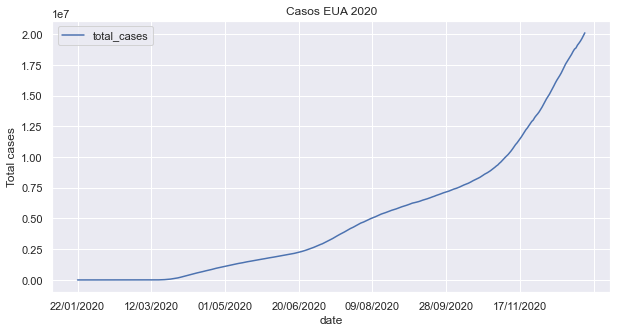

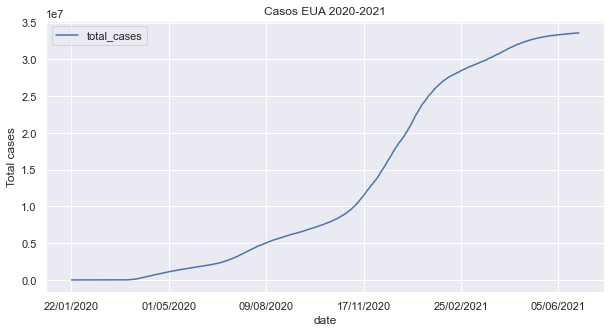

In [368]:
usa_casos = pd.DataFrame(data['total_cases'])
usa_casos_antes = usa_casos.loc['22/01/2020':'31/12/2020']

#2020
usa_casos_antes.plot(figsize=[10,5])
plt.ylabel('Total cases')
plt.title('Casos EUA 2020')
#2020-2021
usa_casos.plot(figsize=[10,5])
plt.ylabel('Total cases')
plt.title('Casos EUA 2020-2021')
usa_casos

(array([85., 25., 31., 20., 12., 10., 11., 12., 17., 17., 15., 13., 10.,
         8.,  5.,  5.,  4.,  4.,  4.,  4.,  4.,  3.,  3.,  3.,  3.,  3.,
         3.,  3.,  4.,  4.]),
 array([1.00000000e+00, 6.70009100e+05, 1.34001720e+06, 2.01002530e+06,
        2.68003340e+06, 3.35004150e+06, 4.02004960e+06, 4.69005770e+06,
        5.36006580e+06, 6.03007390e+06, 6.70008200e+06, 7.37009010e+06,
        8.04009820e+06, 8.71010630e+06, 9.38011440e+06, 1.00501225e+07,
        1.07201306e+07, 1.13901387e+07, 1.20601468e+07, 1.27301549e+07,
        1.34001630e+07, 1.40701711e+07, 1.47401792e+07, 1.54101873e+07,
        1.60801954e+07, 1.67502035e+07, 1.74202116e+07, 1.80902197e+07,
        1.87602278e+07, 1.94302359e+07, 2.01002440e+07]),
 <BarContainer object of 30 artists>)

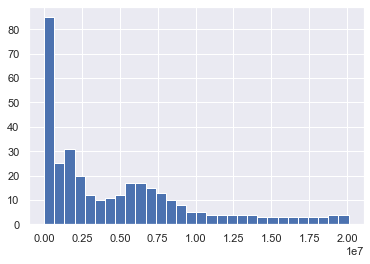

In [297]:
##Histograma 2020
plt.hist(np.array(usa_casos_antes['total_cases']), bins=30)

(array([101.,  49.,  23.,  17.,  22.,  28.,  25.,  16.,  11.,   7.,   6.,
          7.,   6.,   5.,   5.,   5.,   6.,   6.,   5.,   4.,   5.,   6.,
          7.,   9.,  13.,  18.,  20.,  16.,  21.,  55.]),
 array([1.00000000e+00, 1.12135103e+06, 2.24270107e+06, 3.36405110e+06,
        4.48540113e+06, 5.60675117e+06, 6.72810120e+06, 7.84945123e+06,
        8.97080127e+06, 1.00921513e+07, 1.12135013e+07, 1.23348514e+07,
        1.34562014e+07, 1.45775514e+07, 1.56989015e+07, 1.68202515e+07,
        1.79416015e+07, 1.90629516e+07, 2.01843016e+07, 2.13056516e+07,
        2.24270017e+07, 2.35483517e+07, 2.46697017e+07, 2.57910518e+07,
        2.69124018e+07, 2.80337518e+07, 2.91551019e+07, 3.02764519e+07,
        3.13978019e+07, 3.25191520e+07, 3.36405020e+07]),
 <BarContainer object of 30 artists>)

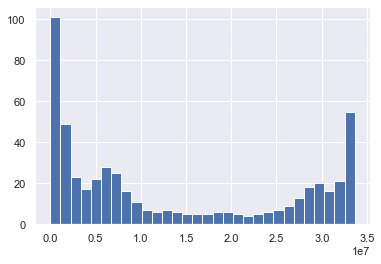

In [5]:
##Histograma 2020-2021
plt.hist(np.array(usa_casos['total_cases']), bins=30)

**KDE**

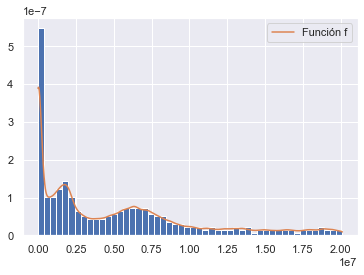

In [94]:
x11 = np.array(usa_casos_antes['total_cases'])
xc20 = np.linspace(x11.min(),x11.max(),1000)
fc20 = kde_hist_f_m(x11, 50, xc20)

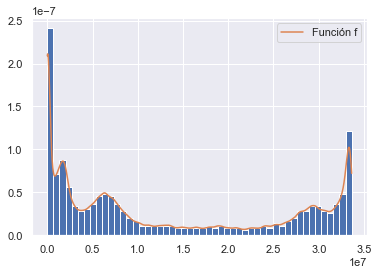

In [230]:
x12 = np.array(usa_casos['total_cases'])
xc21 = np.linspace(x12.min(),x12.max(),1000)
fc21 = kde_hist_f_m(x12, 50, xc21)

**Aceptación y rechazo**

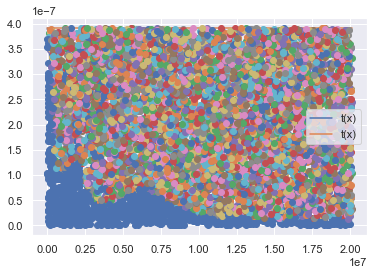

array([1.20816232e+07, 2.48986660e+06, 8.73019799e+06, 1.25468268e+07,
       1.84492164e+07, 3.46391570e+06, 1.99412102e+07, 1.37685381e+07,
       8.72823601e+06, 1.05654287e+07, 1.32761698e+06, 1.24043563e+07,
       2.63944786e+06, 1.16322049e+07, 1.78106992e+06, 1.16955176e+07,
       8.78704053e+06, 1.67999275e+07, 6.04587866e+06, 9.85519340e+06,
       1.03113796e+06, 1.70626076e+07, 1.63775835e+07, 1.45813861e+07,
       1.88227301e+07, 1.67491271e+07, 1.40599283e+07, 3.79046077e+06,
       1.11724881e+07, 1.67515460e+07, 5.12291219e+05, 1.13387445e+07,
       1.06810235e+07, 7.50451189e+05, 4.30462978e+06, 2.79189522e+06,
       1.79305760e+05, 9.25953592e+06, 5.88668340e+06, 4.36165245e+06,
       1.87512204e+07, 3.78683416e+06, 5.81636481e+06, 8.49432960e+06,
       8.60975813e+06, 1.04502693e+07, 2.94051147e+06, 5.41494488e+06,
       9.45691111e+06, 2.79571375e+06, 8.52525061e+06, 3.97411164e+06,
       5.22866433e+05, 2.42643072e+06, 5.37458874e+06, 2.55880955e+06,
      

In [288]:
#2020
Acasos_antes = generar_aleatorias_reducc_var(1000,fc20,1,xc20,usa_casos_antes,estra_igualmente_espaciado,1000)
Acasos_antes

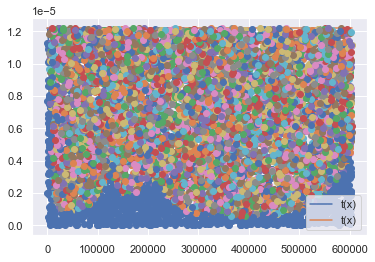

array([2.92962151e+05, 1.77052722e+05, 1.64825056e+04, 5.03622876e+05,
       1.57431390e+04, 3.35998165e+05, 5.12454726e+05, 4.03356217e+05,
       2.05933535e+05, 4.94508692e+05, 5.05658254e+05, 2.24020709e+05,
       4.35238408e+05, 8.26364314e+04, 2.86395663e+05, 5.10915953e+05,
       5.22804220e+05, 4.93108477e+03, 3.90949726e+05, 4.52673459e+05,
       1.01990320e+05, 4.93624694e+05, 1.20257479e+04, 5.75242673e+04,
       2.83718526e+05, 3.87633471e+04, 3.98085309e+05, 5.02281935e+05,
       1.61131462e+05, 4.33027309e+05, 8.47355655e+04, 1.72559694e+05,
       5.32010453e+04, 1.09426059e+05, 3.30635743e+05, 9.42314121e+04,
       9.04172969e+04, 1.90393890e+05, 1.59570504e+04, 5.48704130e+05,
       3.63444248e+05, 3.80768581e+05, 5.51007639e+05, 1.65763125e+05,
       3.43289104e+05, 3.83212209e+05, 3.48980453e+05, 1.54247135e+05,
       5.21549888e+05, 5.73618064e+04, 3.28572094e+05, 2.35526895e+05,
       1.98018955e+05, 3.19789834e+05, 5.28694458e+05, 1.15378197e+05,
      

In [289]:
#2021
Acasos = generar_aleatorias_reducc_var(1000,fm21,0,xm21,usa_muertes,estra_igualmente_espaciado,1000)
Acasos

**Función para distribución**

In [395]:
def subplot_dist(lis: 'Insertar la lista con los datos',titu: 'Insertar lista de títulos'):   
    fig, ax = plt.subplots(1, len(lis), sharey=True, figsize=(20, 6))
    fig.subplots_adjust(wspace=.1)
    [ax[i].hist(lis[i]) for i in range(len(lis))]
    [ax[i].set_title(titu[i]) for i in range(len(titu))]

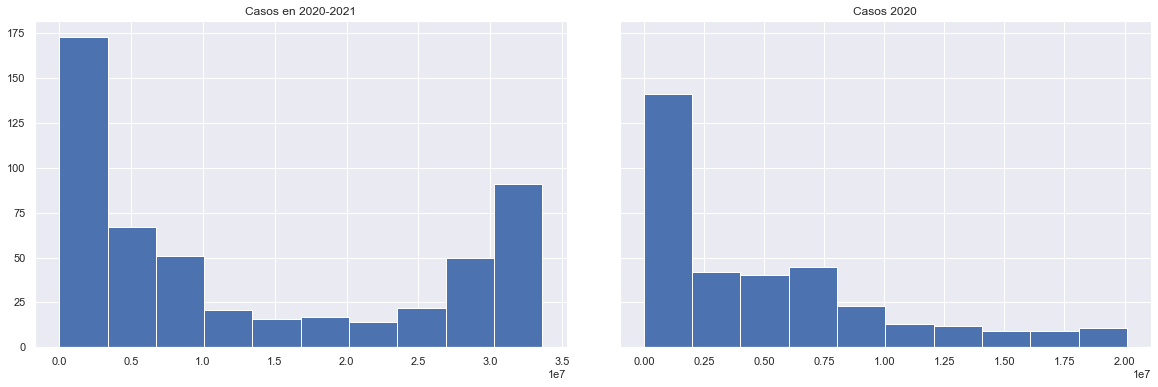

In [397]:
lista_2 = [usa_casos['total_cases'].values,usa_casos_antes['total_cases'].values]
titulos_2 = ['Casos en 2020-2021','Casos 2020']
subplot_dist(lista_2,titulos_2)

**KDE**

In [398]:
from sklearn.neighbors import KernelDensity
import sklearn
#Creando función
from sklearn.model_selection import GridSearchCV
global pdf
def trans_a_kernel(lis:'Insertar la lista con los datos',
                  titu:'Insertar lista de títulos'):
    grid = GridSearchCV(KernelDensity(), #Busca el ancho óptimo.
                    {'bandwidth': np.linspace(0.1, lis.max(), 1000)},
                    cv=20) # 20-fold cross-validation
    grid.fit(lis[:, None])
    kde = grid.best_estimator_
    pdf = np.exp(kde.score_samples(np.linspace(0.1, lis.max(), 1000)[:, None])) #Kernel

    plt.figure()
    plt.plot(np.linspace(0.1, lis.max(), 1000), pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
    plt.hist(lis, 10, fc='gray', histtype='stepfilled', alpha=0.3, density=True) #Alpha puede cambiar
    plt.legend(loc='upper left')
    plt.title(titu)
    plt.show()
    
    return pdf, grid

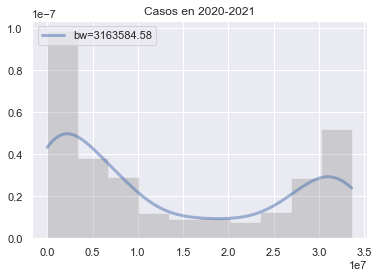

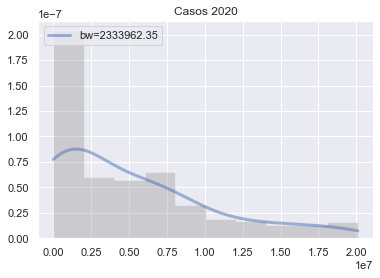

[(array([4.33151407e-08, 4.35101013e-08, 4.37024082e-08, 4.38920319e-08,
         4.40789435e-08, 4.42631153e-08, 4.44445202e-08, 4.46231319e-08,
         4.47989251e-08, 4.49718754e-08, 4.51419591e-08, 4.53091534e-08,
         4.54734366e-08, 4.56347876e-08, 4.57931865e-08, 4.59486141e-08,
         4.61010520e-08, 4.62504831e-08, 4.63968909e-08, 4.65402599e-08,
         4.66805755e-08, 4.68178242e-08, 4.69519931e-08, 4.70830706e-08,
         4.72110457e-08, 4.73359086e-08, 4.74576502e-08, 4.75762625e-08,
         4.76917384e-08, 4.78040716e-08, 4.79132568e-08, 4.80192898e-08,
         4.81221669e-08, 4.82218858e-08, 4.83184447e-08, 4.84118429e-08,
         4.85020806e-08, 4.85891588e-08, 4.86730796e-08, 4.87538456e-08,
         4.88314606e-08, 4.89059292e-08, 4.89772567e-08, 4.90454495e-08,
         4.91105145e-08, 4.91724597e-08, 4.92312939e-08, 4.92870265e-08,
         4.93396680e-08, 4.93892294e-08, 4.94357226e-08, 4.94791603e-08,
         4.95195559e-08, 4.95569236e-08, 4.95912780

In [400]:
[trans_a_kernel(lista_2[i],titulos_2[i]) for i in range(len(lista_2))]

**Aceptación y rechazo**

In [421]:
def Acep_rechazo2(m:'base para sacar máximo',
                  f:'función objetivo a generar',
                  t:'función que mayora a f',
                  N: 'numero de variables a generar'):
    
    variables_aleatorias = np.zeros(N)
    i = 0
    j=0
    while j < N:
        R2 = np.random.rand(1)
        R1 = np.random.uniform(0, m.max_data, 1)
        f_x = f(R1)
        t_x = t(R1)
        condition = R2*t_x <= f_x
        if condition:
            variables_aleatorias[j] = R1
            j=j+1
        i+=1
    return np.array(variables_aleatorias).reshape(1,-1)

global pdf
def trans_a_kernel2(lis:'Insertar la lista con los datos',
                  titu:'Insertar lista de títulos'):
    grid = GridSearchCV(KernelDensity(), #Busca el ancho óptimo.
                    {'bandwidth': np.linspace(0.1, lis.max(), 1000)},
                    cv=20) # 20-fold cross-validation
    grid.fit(lis[:, None])
    kde = grid.best_estimator_
    pdf = np.exp(kde.score_samples(np.linspace(0.1, lis.max(), 1000)[:, None])) #Kernel
    return pdf, grid

#Las instancias son cada elemnto de las listas, cada país y asi :)
def obtenerVariablesAleatorias(Instancia, N, hist=False):
    t = lambda x: max(Instancia.pdf) * np.ones(len(x))
    x = np.arange(0, Instancia.max_data, 1)
    
    # Aqui le decimos que queremos N variables
    random_variables = Acep_rechazo2(Instancia,Instancia.f, t, N)
    
    if hist:
        plt.figure()
        plt.hist(random_variables,75, density=True)
        plt.plot(x, Instancia.f(x), label='f(x)')
        plt.show()
        
    confianza = .95
    interval = st.t.interval(confianza,len(random_variables)-1, loc=np.mean(random_variables), scale=st.sem(random_variables))
    print('Con una confianza de %2.2f la media diaria estará en el intervalo ,\n %s' %(confianza,interval))
    print('El valor medio diario es', random_variables.mean())
    return random_variables

#Clase para poder realizar las variables aleatorias sin copy/paste de todo lo de arriba
class Distribucion():
    def __init__(self, lis, titulo):
        self.data = lis
        self.title = titulo
        self.pdf, self.grid = trans_a_kernel2(lis, titulo)
        self.max_data = max(lis)
        
    
    def f(self, x):
        return np.exp(np.array([self.grid.best_estimator_.score_samples(i)[0] for i in x]))

In [422]:
print('Casos en 2020 en USA')
usa20 = Distribucion(lista_2[0],titulos_2[0])
vausa20 = obtenerVariablesAleatorias(usa20,10000, hist=True)

Casos en 2020 en USA


ValueError: Expected 2D array, got scalar array instead:
array=323084.94023025036.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

**Prueba de hipótesis**

### Total de muertes

Text(0.5, 1.0, 'Muertes EUA 2020-2021')

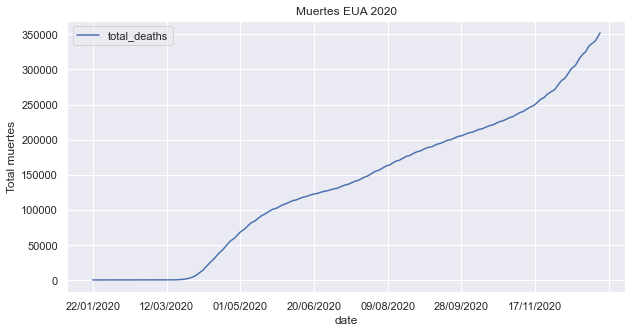

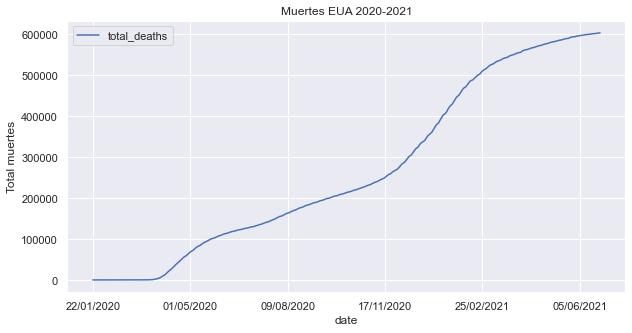

In [393]:
usa_muertes = pd.DataFrame(data['total_deaths'])
usa_muertes_antes = usa_muertes.loc['22/01/2020':'31/12/2020']

#2020
usa_muertes_antes.plot(figsize=[10,5])
plt.ylabel('Total muertes')
plt.title('Muertes EUA 2020')
#2020-2021
usa_muertes.plot(figsize=[10,5])
plt.ylabel('Total muertes')
plt.title('Muertes EUA 2020-2021')


(array([74.,  5.,  6.,  5.,  6.,  6.,  6.,  9., 11., 14., 21., 16., 11.,
        12., 11., 13., 16., 17., 15., 13., 10.,  8.,  8.,  4.,  6.,  4.,
         4.,  5.,  5.,  4.]),
 array([     0.        ,  11740.36666667,  23480.73333333,  35221.1       ,
         46961.46666667,  58701.83333333,  70442.2       ,  82182.56666667,
         93922.93333333, 105663.3       , 117403.66666667, 129144.03333333,
        140884.4       , 152624.76666667, 164365.13333333, 176105.5       ,
        187845.86666667, 199586.23333333, 211326.6       , 223066.96666667,
        234807.33333333, 246547.7       , 258288.06666667, 270028.43333333,
        281768.8       , 293509.16666667, 305249.53333333, 316989.9       ,
        328730.26666667, 340470.63333333, 352211.        ]),
 <BarContainer object of 30 artists>)

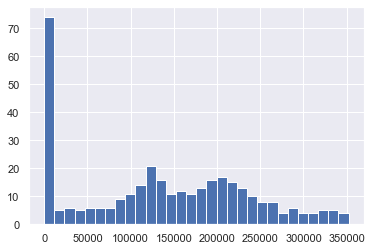

In [380]:
##Histograma de datos 2020
plt.hist(np.array(usa_muertes_antes['total_deaths']), bins=30)

(array([78.,  9., 10., 10., 15., 26., 31., 19., 21., 26., 27., 21., 14.,
        10.,  8.,  8.,  9.,  7.,  6.,  5.,  7.,  6.,  7.,  7., 11., 10.,
        17., 22., 29., 46.]),
 array([     0. ,  20129.7,  40259.4,  60389.1,  80518.8, 100648.5,
        120778.2, 140907.9, 161037.6, 181167.3, 201297. , 221426.7,
        241556.4, 261686.1, 281815.8, 301945.5, 322075.2, 342204.9,
        362334.6, 382464.3, 402594. , 422723.7, 442853.4, 462983.1,
        483112.8, 503242.5, 523372.2, 543501.9, 563631.6, 583761.3,
        603891. ]),
 <BarContainer object of 30 artists>)

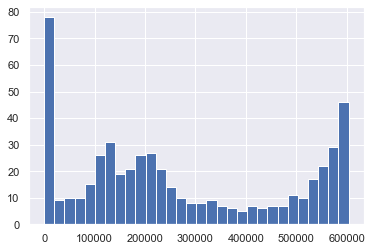

In [381]:
##Histograma de datos 2020-2021
plt.hist(np.array(usa_muertes['total_deaths']), bins=30)

In [382]:
usa0 = usa_muertes[usa_muertes['total_deaths'] != 0]


**KDE**

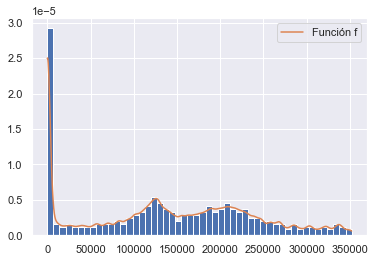

In [383]:
x21 = np.array(usa_muertes_antes['total_deaths'])
xm20 = np.linspace(x21.min(),x21.max(),1000)
fm20 = kde_hist_f_m(x21, 50, xm20)

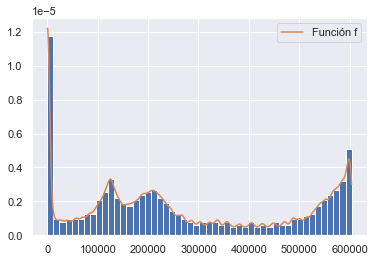

In [384]:
x22 = np.array(usa_muertes['total_deaths'])
xm21 = np.linspace(x22.min(),x22.max(),1000)
fm21 = kde_hist_f_m(x22, 50, xm21)

**Aceptación y rechazo**

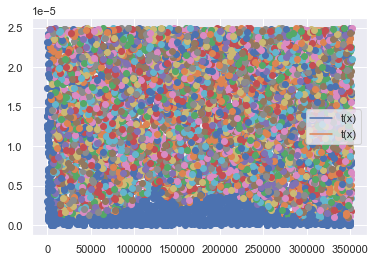

array([4.84947581e+03, 3.38503572e+05, 1.26309116e+05, 6.84867399e+04,
       2.54561307e+05, 1.65878431e+05, 3.18490521e+05, 1.79290788e+05,
       1.45572592e+05, 3.40808257e+04, 3.42840014e+05, 2.05314757e+05,
       3.48681348e+05, 1.67698405e+05, 1.96025414e+05, 4.10734588e+04,
       1.95568953e+05, 2.36177181e+05, 5.16056000e+04, 1.35725565e+05,
       4.30284623e+03, 2.69520877e+05, 1.86142050e+05, 1.28443988e+05,
       7.71499302e+04, 1.17968437e+04, 6.19885948e+04, 5.59312301e+04,
       3.46518274e+05, 2.82858402e+04, 1.18994786e+05, 2.50574077e+05,
       1.89365890e+05, 6.65437931e+04, 8.97858497e+04, 2.18784829e+05,
       2.78718724e+05, 2.10664256e+05, 5.17410575e+03, 2.14213822e+05,
       1.07947367e+05, 2.27172463e+05, 1.38614973e+05, 2.21625397e+05,
       2.64695585e+05, 2.12152988e+05, 1.29256745e+05, 1.09837204e+05,
       8.66302849e+04, 3.37382230e+05, 2.50908716e+05, 7.03638154e+04,
       2.42723342e+05, 2.62027384e+05, 1.32935094e+05, 2.70820266e+05,
      

In [385]:
#2020
Amuert_antes = generar_aleatorias_reducc_var(1000,fm20,0,xm20,usa_muertes_antes,estra_igualmente_espaciado,1000)
Amuert_antes

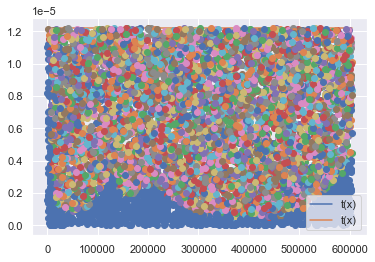

array([3.54886239e+05, 4.30150748e+05, 5.87080273e+05, 3.41204966e+05,
       1.59336408e+04, 1.06063668e+05, 5.07397684e+05, 4.05319841e+05,
       2.65165105e+05, 1.23104057e+05, 2.49257579e+05, 5.59205674e+05,
       2.98911269e+03, 1.32580039e+05, 3.18164031e+05, 3.51506018e+05,
       1.53237459e+05, 3.80187077e+04, 1.99265880e+05, 2.52454244e+04,
       1.54300970e+05, 4.57516947e+05, 4.77993639e+05, 2.71984610e+05,
       5.77386915e+05, 1.48808081e+05, 3.21842875e+05, 2.14495441e+05,
       2.89447089e+05, 5.63890136e+05, 1.70771018e+05, 4.40156039e+05,
       3.83065898e+05, 3.05183345e+05, 5.36319865e+05, 1.20653261e+05,
       3.53718288e+05, 4.81889666e+04, 3.47603572e+05, 1.77250966e+05,
       4.28097705e+05, 1.21034842e+05, 1.67536138e+04, 1.52020677e+05,
       5.59676275e+05, 2.22650775e+05, 8.24857131e+04, 5.37233119e+05,
       2.40280811e+05, 2.04071659e+05, 3.06137249e+05, 4.83760589e+05,
       4.26593210e+05, 1.86803521e+05, 5.11699333e+05, 1.02387571e+05,
      

In [286]:
##2020-2021
Amuert = generar_aleatorias_reducc_var(1000,fm21,5,xm21,usa_muertes,estra_igualmente_espaciado,1000)
Amuert

### Pacientes hospitalizados

Text(0.5, 1.0, 'Pacientes hospitalizados EUA 2020-2021')

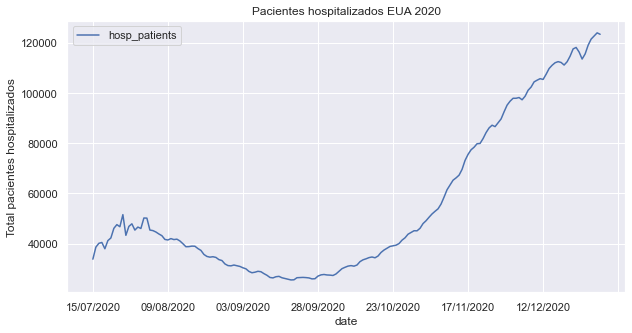

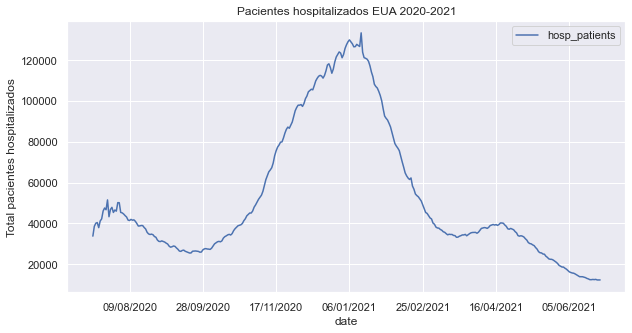

In [335]:
usa_hosp = pd.DataFrame(data['hosp_patients'])
usa_hosp_antes = usa_hosp.loc['22/01/2020':'31/12/2020']

#2020
usa_hosp_antes.plot(figsize=[10,5])
plt.ylabel('Total pacientes hospitalizados')
plt.title('Pacientes hospitalizados EUA 2020')
#2020-2021
usa_hosp.plot(figsize=[10,5])
plt.ylabel('Total pacientes hospitalizados')
plt.title('Pacientes hospitalizados EUA 2020-2021')

(array([28., 17., 14.,  8., 18., 12., 11.,  5.,  3.,  1.,  2.,  1.,  3.,
         1.,  1.,  2.,  3.,  2.,  3.,  2.,  1.,  3.,  4.,  2.,  5.,  1.,
         7.,  3.,  3.,  4.]),
 array([ 25488.        ,  28767.86666667,  32047.73333333,  35327.6       ,
         38607.46666667,  41887.33333333,  45167.2       ,  48447.06666667,
         51726.93333333,  55006.8       ,  58286.66666667,  61566.53333333,
         64846.4       ,  68126.26666667,  71406.13333333,  74686.        ,
         77965.86666667,  81245.73333333,  84525.6       ,  87805.46666667,
         91085.33333333,  94365.2       ,  97645.06666667, 100924.93333333,
        104204.8       , 107484.66666667, 110764.53333333, 114044.4       ,
        117324.26666667, 120604.13333333, 123884.        ]),
 <BarContainer object of 30 artists>)

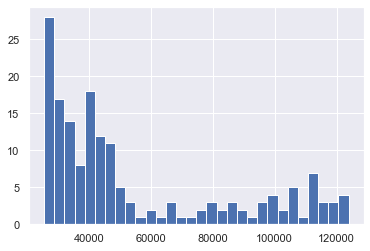

In [330]:
##Histograma 2020
plt.hist(np.array(usa_hosp_antes['hosp_patients']), bins=30)

(array([22.,  8.,  8., 33., 25., 49., 48., 18., 18.,  9.,  6.,  3.,  6.,
         5.,  2.,  4.,  7.,  4.,  5.,  6.,  3.,  6.,  5.,  7.,  8.,  5.,
         9.,  6., 10.,  2.]),
 array([ 12326. ,  16355.6,  20385.2,  24414.8,  28444.4,  32474. ,
         36503.6,  40533.2,  44562.8,  48592.4,  52622. ,  56651.6,
         60681.2,  64710.8,  68740.4,  72770. ,  76799.6,  80829.2,
         84858.8,  88888.4,  92918. ,  96947.6, 100977.2, 105006.8,
        109036.4, 113066. , 117095.6, 121125.2, 125154.8, 129184.4,
        133214. ]),
 <BarContainer object of 30 artists>)

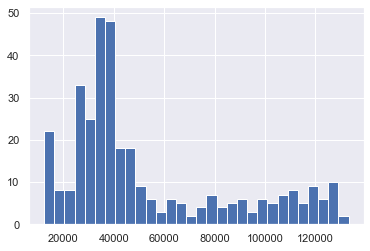

In [331]:
##Histograma 2020-2021
plt.hist(np.array(usa_hosp['hosp_patients']), bins=30)

In [332]:
#hosp0 = usa_hosp[usa_hosp['hosp_patients'] !=0]


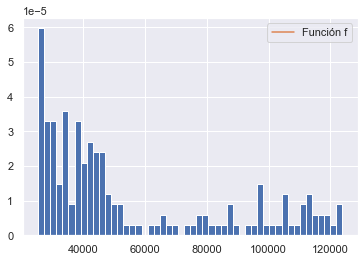

In [333]:
x31 = np.array(usa_hosp_antes['hosp_patients'])
xh20 = np.linspace(x31.min(),x31.max(),1000)
fh20 = kde_hist_f_m(x31, 50, xh20)

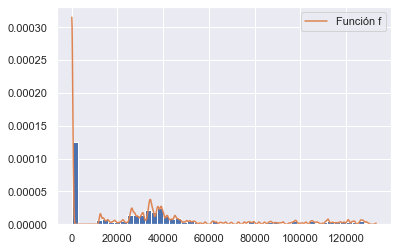

In [325]:
x32 = np.array(usa_hosp['hosp_patients'])
xh21 = np.linspace(x32.min(),x32.max(),1000)
fh21 = kde_hist_f_m(x32, 50, xh21)

**Aceptación y rechazo**

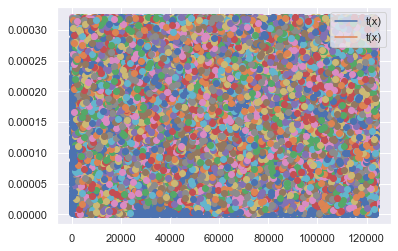

array([1.02499340e+05, 4.69959234e+04, 1.10884639e+05, 1.13542042e+05,
       3.51520313e+04, 4.58808740e+04, 3.42268832e+04, 3.16412463e+04,
       3.39778528e+04, 3.10532512e+04, 1.40251094e+02, 3.96332529e+04,
       2.55756863e+04, 8.33683343e+01, 2.78912452e+04, 2.71359157e+04,
       4.86287494e+02, 8.85574001e+02, 1.17137876e+03, 4.06481201e+02,
       5.17522698e+02, 8.48463224e+01, 3.15409107e+02, 4.98047963e+04,
       2.45246847e+04, 6.37656230e+04, 4.15411336e+04, 4.37256208e+04,
       3.68503964e+04, 3.85126706e+04, 3.28482625e+04, 2.85295666e+04,
       1.16288834e+03, 8.74932084e+02, 4.42186916e+02, 1.45216479e+02,
       9.80362263e+01, 1.24484501e+02, 1.34296436e+03, 9.47501705e+04,
       3.69559387e+04, 1.23057526e+05, 2.42577737e+02, 9.62726105e+02,
       3.53582363e+04, 3.20867304e+04, 2.98555977e+04, 4.13064652e+04,
       2.67398955e+04, 1.28955744e+03, 9.82443492e+01, 5.18517912e+02,
       5.67596819e+02, 1.72206628e+02, 8.22087311e+04, 8.72212394e+04,
      

In [326]:
##2020
Ahosp_antes = generar_aleatorias_reducc_var(1000,fh20,1,xh20,usa_hosp_antes,estra_igualmente_espaciado,1000)
Ahosp_antes

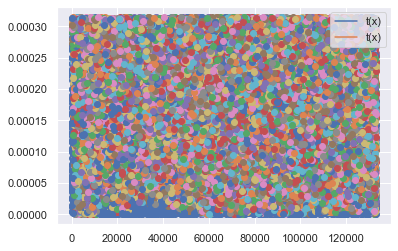

array([1.32625523e+05, 1.16100512e+05, 4.31776573e+04, 9.63609950e+04,
       4.66799323e+04, 2.21136653e+04, 3.91548692e+04, 3.29788090e+04,
       1.48699256e+04, 1.58122028e+04, 1.12454791e+05, 3.94565389e+04,
       1.26939669e+05, 3.92378041e+04, 3.78679052e+04, 3.35726117e+04,
       3.76588524e+04, 3.91306812e+04, 3.54264310e+04, 3.76956707e+02,
       7.48137157e+02, 3.19970893e+01, 1.10416855e+02, 2.60429123e+04,
       5.67051375e+04, 2.60150917e+04, 5.01943644e+04, 6.75245105e+04,
       9.17333095e+04, 6.13704770e+04, 3.03172141e+04, 1.23625214e+05,
       1.20783924e+05, 3.59408874e+04, 3.17318787e+04, 1.28849029e+04,
       5.14821836e+02, 3.51104703e+04, 3.40639454e+04, 6.19572587e+02,
       3.34206990e+02, 4.78320651e+02, 1.38738623e+04, 2.76545695e+04,
       3.67113687e+04, 4.20628771e+04, 1.70757498e+04, 1.17579098e+05,
       4.85631675e+04, 1.62915291e+04, 5.29171179e+04, 1.20238477e+05,
       1.33669590e+04, 3.99649210e+04, 2.70942266e+04, 3.13388804e+04,
      

In [327]:
##2020-2021
Ahosp = generar_aleatorias_reducc_var(1000,fh21,1,xh21,usa_hosp,estra_igualmente_espaciado,1000)
Ahosp

### Total vacunados

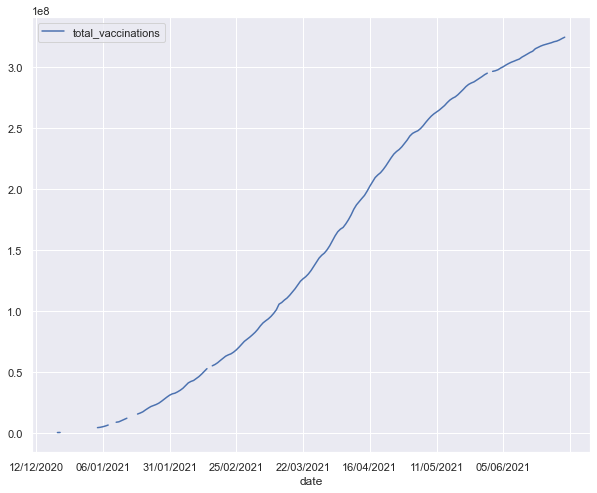

In [51]:
usa_vac = pd.DataFrame(data['total_vaccinations'])
usa_vac.plot(figsize=[10,8])

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>